<a href="https://colab.research.google.com/github/jigjid/github_task/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Preprocessing** and **Import library**

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm

# Creating dataset
X, y = datasets.make_blobs(

        n_samples = 100, # Number of samples
        n_features = 2, # Features
        centers = 2,
        cluster_std = 1,
        random_state=40
    )

# Classes 1 and -1
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
print(f"X_train: {X_train.shape}\nX_test: {X_test.shape} \
\ny_train: {y_train.shape}\ny_test: {y_test.shape}")

X_train: (50, 2)
X_test: (50, 2) 
y_train: (50,)
y_test: (50,)


In [ ]:
print(X_train[:10])

[[-1.13599245 -7.83714475]
 [ 6.57763844 -5.14520694]
 [ 4.91043779 -5.31295279]
 [-1.79218634 -8.63472578]
 [ 4.88032295 -3.36537701]
 [ 5.89719054 -4.4086904 ]
 [-3.69066047 -9.35968162]
 [-1.3143854  -9.90970266]
 [-1.77146079 -9.39829903]
 [ 6.80160015 -3.94990297]]


In [ ]:
print(y_train[:10])

[-1  1  1 -1  1  1 -1 -1 -1  1]


###**Problem 1-3**

In [ ]:
class scratchSVM(object):
      """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
      def __init__(self, C = 1.0,verbose=True, batch_size=100, learning_rate=0.001, epochs=100):
          # C = error term
          self.C = C
          self.w = 0
          self.b = 0
          self.verbose = verbose
          self.batch_size = batch_size
          self.learning_rate = learning_rate
          self.epochs = epochs


      def hingeloss(self, w, b, x, y):
          # Regularizer term
          reg = 0.5 * (w * w)

          for i in range(x.shape[0]):
              # Optimization term
              opt_term = y[i] * ((np.dot(w, x[i])) + b)

              # calculating loss
              loss = reg + self.C * max(0, 1-opt_term)
          return loss[0][0]
    
      def fit(self, X, Y):
          """
          SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

          Parameters
          ----------
          X : 次の形のndarray, shape (n_samples, n_features)
              訓練データの特徴量
          y : 次の形のndarray, shape (n_samples, )
              訓練データの正解値
          X_val : 次の形のndarray, shape (n_samples, n_features)
              検証データの特徴量
          y_val : 次の形のndarray, shape (n_samples, )
              検証データの正解値
          """
          # The number of features in X
          number_of_features = X.shape[1]

          # The number of Samples in X
          number_of_samples = X.shape[0]

          c = self.C

          # Creating ids from 0 to number_of_samples - 1
          ids = np.arange(number_of_samples)

          # Shuffling the samples randomly
          np.random.shuffle(ids)

          # creating an array of zeros
          w = np.zeros((1, number_of_features))
          b = 0
          losses = []

          # Gradient Descent logic
          for i in range(self.epochs):
              # Calculating the Hinge Loss
              l = self.hingeloss(w, b, X, Y)

              # Appending all losses 
              losses.append(l)
              
              # Starting from 0 to the number of samples with batch_size as interval
              for batch_initial in range(0, number_of_samples, self.batch_size):
                  gradw = 0
                  gradb = 0

                  for j in range(batch_initial, batch_initial + self.batch_size):
                      if j < number_of_samples:
                          x = ids[j]
                          ti = Y[x] * (np.dot(w, X[x].T) + b)

                          if ti > 1:
                              gradw += 0
                              gradb += 0
                          else:
                              # Calculating the gradients

                              #w.r.t w 
                              gradw += c * Y[x] * X[x]
                              # w.r.t b
                              gradb += c * Y[x]

                  # Updating weights and bias
                  w = w - self.learning_rate * w + self.learning_rate * gradw
                  b = b + self.learning_rate * gradb
              
              if self.verbose:
                  #verboseをTrueにした際は学習過程を出力
                  print("epoch: {}, loss: {}".format(i,l))
          
          self.w = w
          self.b = b

          return self.w, self.b, losses 
    
      def predict(self, X):
          """
          SVM分類器を使いラベルを推定する。

          Parameters
          ----------
          X : 次の形のndarray, shape (n_samples, n_features)
              サンプル

          Returns
          -------
              次の形のndarray, shape (n_samples, 1)
              SVM分類器による推定結果
          """
          prediction = np.dot(X, self.w[0]) + self.b # w.x + b
          return np.sign(prediction)

###**【Problem 4】**Learning and estimation

###**Implenmentation of my scratch**

In [ ]:
my_svm = scratchSVM()
w, b, losses = my_svm.fit(X_train, y_train)

prediction = my_svm.predict(X_test)

# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))
print("w, b:", [w, b])

epoch: 0, loss: 1.0
epoch: 1, loss: 0.07021230572002354
epoch: 2, loss: 0.043376698101217304
epoch: 3, loss: 0.04899615514976494
epoch: 4, loss: 0.055660308995054884
epoch: 5, loss: 0.05991419317398983
epoch: 6, loss: 0.06393006453422267
epoch: 7, loss: 0.06511998402453191
epoch: 8, loss: 0.06774286653318794
epoch: 9, loss: 0.06885396110405563
epoch: 10, loss: 0.07154640211008971
epoch: 11, loss: 0.07268425165224651
epoch: 12, loss: 0.0738299266287202
epoch: 13, loss: 0.07498340129647199
epoch: 14, loss: 0.07614464997402348
epoch: 15, loss: 0.0773136470413234
epoch: 16, loss: 0.07849036693961481
epoch: 17, loss: 0.0796747841713024
epoch: 18, loss: 0.08086687329982026
epoch: 19, loss: 0.08376987061690169
epoch: 20, loss: 0.0849879223184466
epoch: 21, loss: 0.08621353449331881
epoch: 22, loss: 0.08744668203277348
epoch: 23, loss: 0.08887537349247533
epoch: 24, loss: 0.09012464505107066
epoch: 25, loss: 0.09138137324874174
epoch: 26, loss: 0.09283771488249133
epoch: 27, loss: 0.0941104019

###**Implementation Sklearn**

In [ ]:
clf = svm.SVC(verbose=True)
# clf.fit(X_train, y_train)
# perdiction_skl = clf.predict(X_test)

clf.fit(X_train, y_train)

perdiction_skl = clf.predict(X_test)

print("Prediction:", perdiction_skl)
print("Accuracy:", accuracy_score(perdiction_skl, y_test))

[LibSVM]Prediction: [-1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1  1
  1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1  1  1 -1  1  1
  1  1]
Accuracy: 1.0


###**【Question 5】**Visualization of decision areas

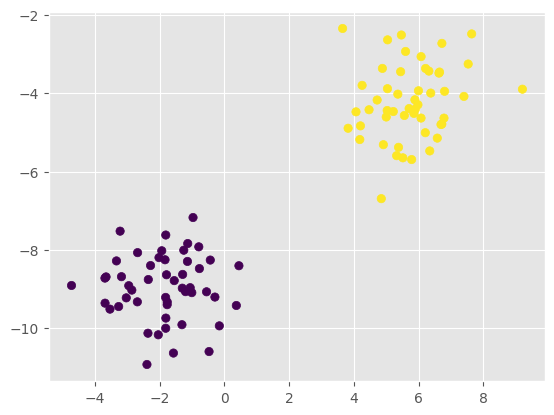

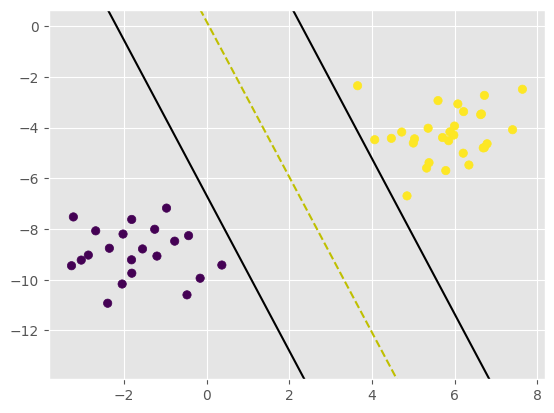

In [ ]:
# Visualizing the scatter plot of the dataset
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)


# Visualizing SVM
def visualize_svm():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0][0] * x + b + offset) / w[0][1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)

    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


visualize_dataset()
visualize_svm()